In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [44]:
neo = pd.read_csv('neo.csv')

In [45]:
neo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [46]:
neo.head()
X = neo

In [47]:
No=neo.isna().sum()
No

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [48]:
print(neo.describe())

                 id  est_diameter_min  est_diameter_max  relative_velocity  \
count  9.083600e+04      90836.000000      90836.000000       90836.000000   
mean   1.438288e+07          0.127432          0.284947       48066.918918   
std    2.087202e+07          0.298511          0.667491       25293.296961   
min    2.000433e+06          0.000609          0.001362         203.346433   
25%    3.448110e+06          0.019256          0.043057       28619.020645   
50%    3.748362e+06          0.048368          0.108153       44190.117890   
75%    3.884023e+06          0.143402          0.320656       62923.604633   
max    5.427591e+07         37.892650         84.730541      236990.128088   

       miss_distance  absolute_magnitude  
count   9.083600e+04        90836.000000  
mean    3.706655e+07           23.527103  
std     2.235204e+07            2.894086  
min     6.745533e+03            9.230000  
25%     1.721082e+07           21.340000  
50%     3.784658e+07           23.70000

In [49]:
numerical_features = neo.select_dtypes(include=['int64', 'float64'])
print(numerical_features.describe().T)

                      count          mean           std           min  \
id                  90836.0  1.438288e+07  2.087202e+07  2.000433e+06   
est_diameter_min    90836.0  1.274321e-01  2.985112e-01  6.089126e-04   
est_diameter_max    90836.0  2.849469e-01  6.674914e-01  1.361570e-03   
relative_velocity   90836.0  4.806692e+04  2.529330e+04  2.033464e+02   
miss_distance       90836.0  3.706655e+07  2.235204e+07  6.745533e+03   
absolute_magnitude  90836.0  2.352710e+01  2.894086e+00  9.230000e+00   

                             25%           50%           75%           max  
id                  3.448110e+06  3.748362e+06  3.884023e+06  5.427591e+07  
est_diameter_min    1.925551e-02  4.836765e-02  1.434019e-01  3.789265e+01  
est_diameter_max    4.305662e-02  1.081534e-01  3.206564e-01  8.473054e+01  
relative_velocity   2.861902e+04  4.419012e+04  6.292360e+04  2.369901e+05  
miss_distance       1.721082e+07  3.784658e+07  5.654900e+07  7.479865e+07  
absolute_magnitude  2.1340

In [50]:
categorical_features = neo.select_dtypes(include=['object'])
print(categorical_features.describe().T)

               count unique                            top   freq
name           90836  27423  469219 Kamo`oalewa (2016 HO3)     43
orbiting_body  90836      1                          Earth  90836


<Axes: xlabel='hazardous', ylabel='count'>

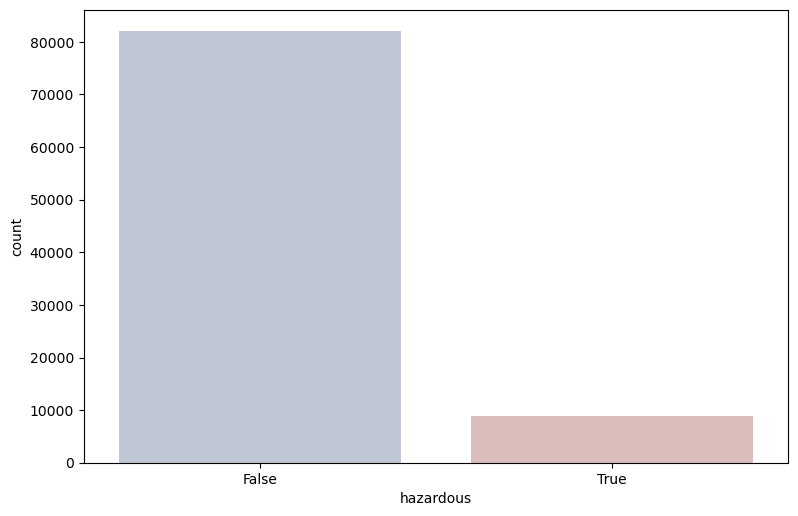

In [51]:
plt.figure(figsize = (20,20))
plt.subplot(3,2,3)
sns.countplot(x = 'hazardous', palette='vlag', data = neo)

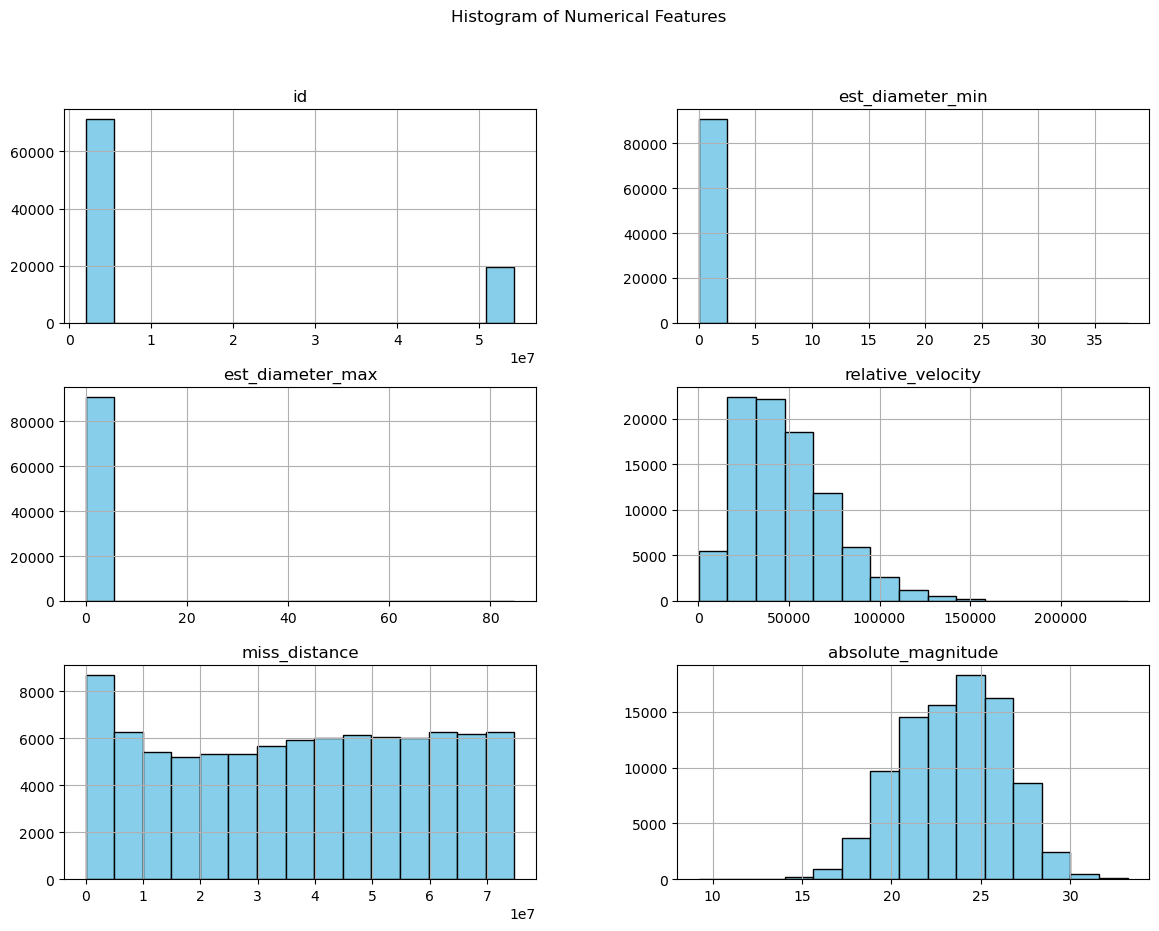

In [52]:
# Histograms for numerical features
numerical_features.hist(bins=15, figsize=(14, 10), color='skyblue', edgecolor='black')
plt.suptitle('Histogram of Numerical Features')
plt.show()

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


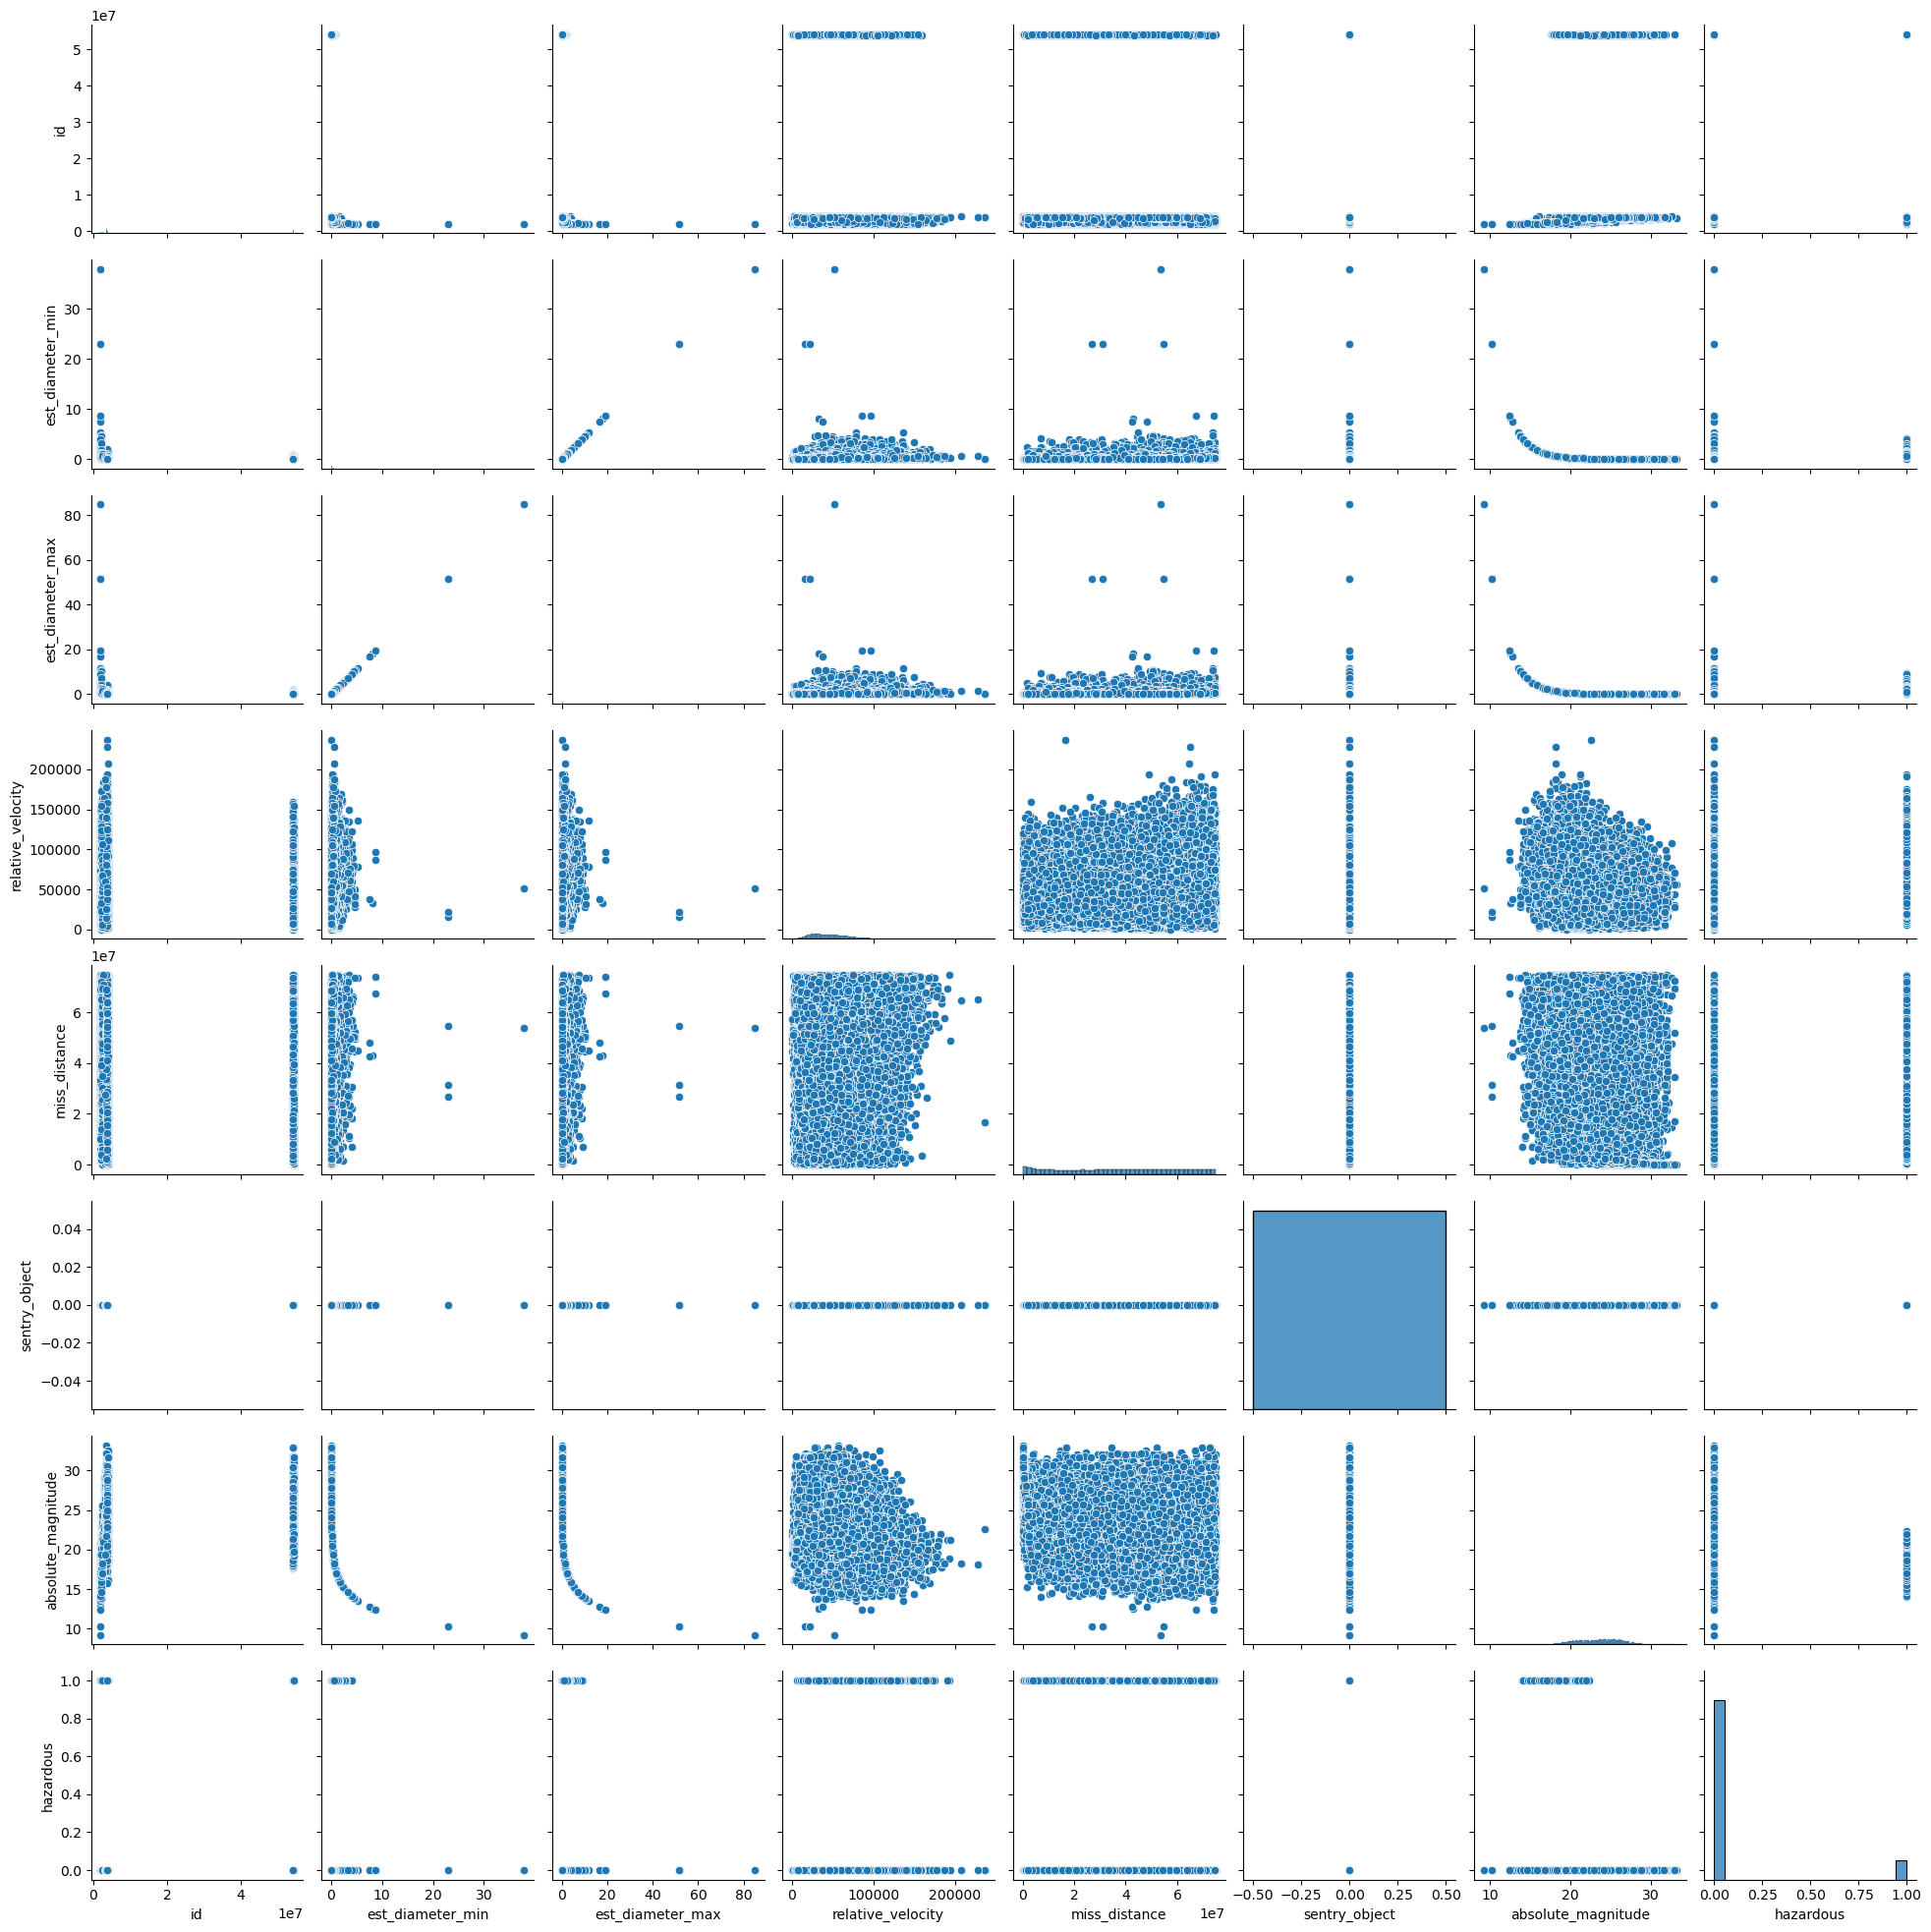

In [53]:
fig= sns.pairplot(X)

<Axes: >

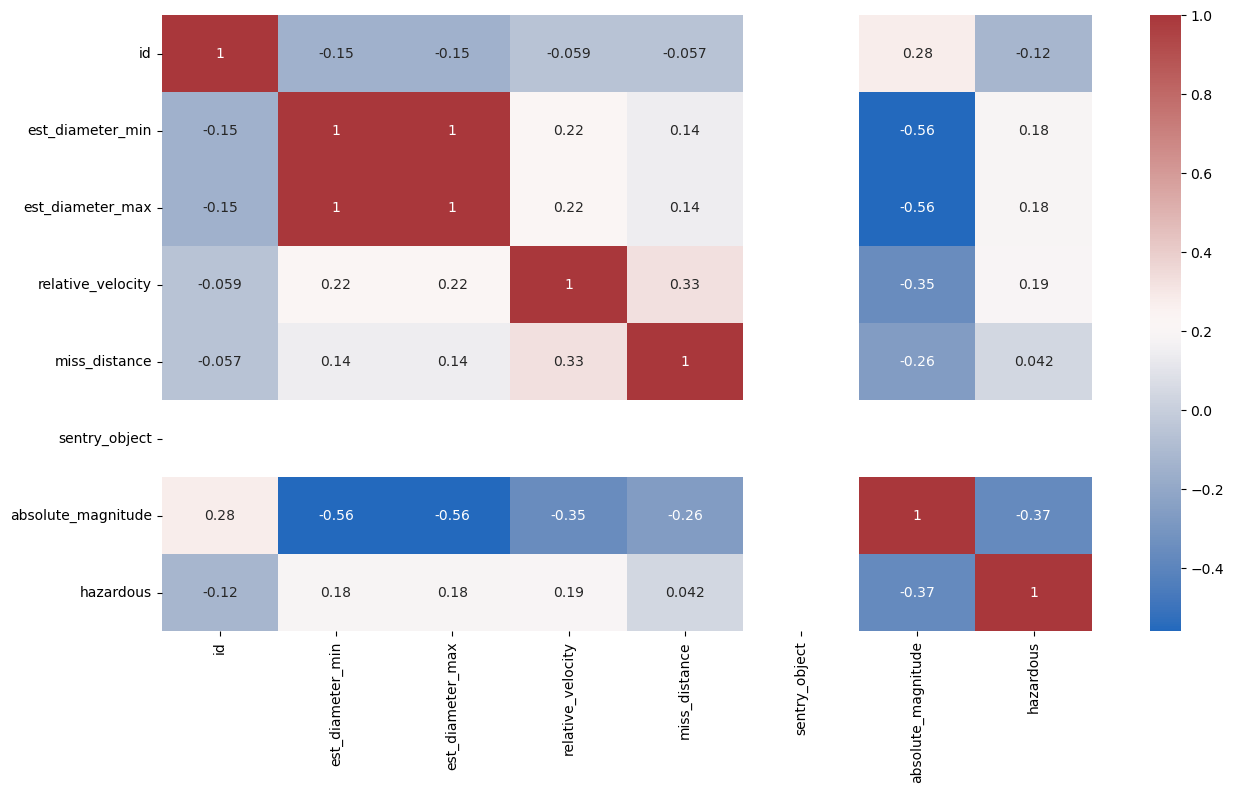

In [54]:
correlation = neo.corr(method='pearson', min_periods=1, numeric_only=True).round(4)
plt.figure(figsize = (15,8))
sns.heatmap(correlation, annot = True, cmap = 'vlag')